<a href="https://colab.research.google.com/github/memelabela/yourpetcare-ml/blob/main/Your_Pet_Care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the Data

In this case we'll using dataset called **Oxford-IIIT Pet Dataset**. To using that data we'll using **TensorFlow Datasets** because there is a data we want in there so we just need serve that without being explicitly.

In [1]:
# Import packages

import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
file_path = './data/oxford_iiit_pet/'

(training_data, testing_data), info = tfds.load('oxford_iiit_pet', data_dir=file_path, with_info=True, split=['train', 'test[:20%]'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to ./data/oxford_iiit_pet/oxford_iiit_pet/3.2.0.incompletePZ3IMS/oxford_iiit_pet-train.tfrecord


  0%|          | 0/3680 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to ./data/oxford_iiit_pet/oxford_iiit_pet/3.2.0.incompletePZ3IMS/oxford_iiit_pet-test.tfrecord


  0%|          | 0/3669 [00:00<?, ? examples/s]

Dataset oxford_iiit_pet downloaded and prepared to ./data/oxford_iiit_pet/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [3]:
info

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    version=3.2.0,
    description='The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
images for each class. The images have large variations in scale, pose and
lighting. All images have an associated ground truth annotation of breed.',
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
        'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=7349,
    splits={
        'test': 3669,
        'train': 3680,
    },
    supervised_keys=('image', 'label'),
    citation="""@InProceedings{parkhi12a,
      author       = "Parkhi, O. M. and Vedaldi, A. and Zisserman, A. and Ja

In [4]:
print('Num of training data   : {}'.format(len(training_data)))
print('Num of testing data    : {}'.format(len(testing_data)))
print('Total data             : {}'.format(len(training_data)+len(testing_data)))

Num of training data   : 3680
Num of testing data    : 734
Total data             : 4414


In [3]:
# Convert into dataframe

training_data = tfds.as_dataframe(training_data, info)
testing_data = tfds.as_dataframe(testing_data, info)

In [6]:
training_data.head()

,file_name,image,label,segmentation_mask,species
0,b'Sphynx_158.jpg',"[[[3, 3, 3], [5, 3, 4], [7, 5, 6], [4, 2, 3], ...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
1,b'english_cocker_spaniel_135.jpg',"[[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...",12,"[[[3], [3], [3], [3], [3], [3], [3], [3], [3],...",1
2,b'British_Shorthair_181.jpg',"[[[44, 32, 6], [44, 34, 7], [44, 34, 7], [41, ...",9,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
3,b'Siamese_161.jpg',"[[[108, 130, 117], [114, 133, 127], [108, 128,...",32,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
4,b'Sphynx_178.jpg',"[[[237, 228, 91], [236, 228, 93], [230, 225, 8...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0


In [4]:
# Format dataframe

training_data['file_name'] = training_data['file_name'].apply(lambda x: x.decode('utf-8'))
testing_data['file_name'] = testing_data['file_name'].apply(lambda x: x.decode('utf-8'))

training_data['label'] = training_data['file_name'].apply(lambda x: x.rsplit('_', 1)[0])
testing_data['label'] = testing_data['file_name'].apply(lambda x: x.rsplit('_', 1)[0])

training_data['file_name'] = training_data['file_name'].apply(
    lambda x: '/content/data/oxford_iiit_pet/downloads/extracted/TAR_GZ.robots.ox.ac.uk_vgg_pets_imageswMR1o1DWRq_DHWToagdXedb7P88RHpceK3WqG77VVwU.tar.gz/images/' + x)
testing_data['file_name'] = testing_data['file_name'].apply(
    lambda x: '/content/data/oxford_iiit_pet/downloads/extracted/TAR_GZ.robots.ox.ac.uk_vgg_pets_imageswMR1o1DWRq_DHWToagdXedb7P88RHpceK3WqG77VVwU.tar.gz/images/' + x)

In [8]:
training_data.head()

,file_name,image,label,segmentation_mask,species
0,/content/data/oxford_iiit_pet/downloads/extrac...,"[[[3, 3, 3], [5, 3, 4], [7, 5, 6], [4, 2, 3], ...",Sphynx,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
1,/content/data/oxford_iiit_pet/downloads/extrac...,"[[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...",english_cocker_spaniel,"[[[3], [3], [3], [3], [3], [3], [3], [3], [3],...",1
2,/content/data/oxford_iiit_pet/downloads/extrac...,"[[[44, 32, 6], [44, 34, 7], [44, 34, 7], [41, ...",British_Shorthair,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
3,/content/data/oxford_iiit_pet/downloads/extrac...,"[[[108, 130, 117], [114, 133, 127], [108, 128,...",Siamese,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
4,/content/data/oxford_iiit_pet/downloads/extrac...,"[[[237, 228, 91], [236, 228, 93], [230, 225, 8...",Sphynx,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0


In [5]:
num_classes = training_data['label'].nunique()
classes = sorted(list(training_data['label'].unique()))

print('Num of classes:', training_data['label'].nunique())

Num of classes: 37


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=25,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_dataframe(
    training_data,
    x_col='file_name',
    y_col='label',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    target_size=IMG_SIZE,
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    testing_data,
    x_col='file_name',
    y_col='label',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    target_size=IMG_SIZE
)

Found 3680 validated image filenames belonging to 37 classes.
Found 734 validated image filenames belonging to 37 classes.


# Building the Model

We'll use two model first is our model **CNN** and the second is using **Tranfer Learning**. Then when we compare both model, the best model will be chosen for the implementation in **Android** and as an **API**



## CNN (Convolutional Neural Network)

In [11]:
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([                       
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMG_SIZE + (3,)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
  ])

  model.compile(optimizer=RMSprop(learning_rate=1e-4),
               loss='categorical_crossentropy',
               metrics=['accuracy'])
  return model

In [12]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [7]:
steps_per_epoch = len(training_data) // BATCH_SIZE
validation_steps = len(testing_data) // BATCH_SIZE

In [13]:
cnn_history = model.fit(
    train_generator,
    epochs=15,
    verbose=1,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps)

Epoch 1/15
115/115 [==============================] - 69s 493ms/step - loss: 3.5663 - accuracy: 0.0546 - val_loss: 3.4589 - val_accuracy: 0.0668
Epoch 2/15
115/115 [==============================] - 55s 480ms/step - loss: 3.3163 - accuracy: 0.1136 - val_loss: 3.3409 - val_accuracy: 0.1009
Epoch 3/15
115/115 [==============================] - 54s 471ms/step - loss: 3.1251 - accuracy: 0.1408 - val_loss: 3.2873 - val_accuracy: 0.1165
Epoch 4/15
115/115 [==============================] - 54s 471ms/step - loss: 3.0183 - accuracy: 0.1709 - val_loss: 3.1778 - val_accuracy: 0.1307
Epoch 5/15
115/115 [==============================] - 55s 479ms/step - loss: 2.8980 - accuracy: 0.2076 - val_loss: 3.2086 - val_accuracy: 0.1406
Epoch 6/15
115/115 [==============================] - 55s 474ms/step - loss: 2.8228 - accuracy: 0.2204 - val_loss: 3.0859 - val_accuracy: 0.1520
Epoch 7/15
115/115 [==============================] - 54s 472ms/step - loss: 2.7533 - accuracy: 0.2435 - val_loss: 3.0864 - val_ac

## Transfer Learning Model

### Setup the pretrained model

In [14]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-28 16:19:00--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   365MB/s    in 0.2s    

2022-05-28 16:19:01 (365 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [15]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = IMG_SIZE + (3,), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [16]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


### Add dense layers for your classifier

In [17]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense (37, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

In [18]:
model.compile(optimizer=RMSprop(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Train the model

In [19]:
inception_history = model.fit(
            train_generator,
            validation_data=test_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=10,
            validation_steps=validation_steps,
            verbose=1)

Epoch 1/10
115/115 [==============================] - 60s 491ms/step - loss: 1.9504 - accuracy: 0.4682 - val_loss: 1.0804 - val_accuracy: 0.6634
Epoch 2/10
115/115 [==============================] - 56s 489ms/step - loss: 0.7079 - accuracy: 0.7842 - val_loss: 0.7865 - val_accuracy: 0.7557
Epoch 3/10
115/115 [==============================] - 56s 484ms/step - loss: 0.4591 - accuracy: 0.8508 - val_loss: 0.7787 - val_accuracy: 0.7557
Epoch 4/10
115/115 [==============================] - 56s 485ms/step - loss: 0.3412 - accuracy: 0.8867 - val_loss: 0.6936 - val_accuracy: 0.7955
Epoch 5/10
115/115 [==============================] - 56s 484ms/step - loss: 0.2542 - accuracy: 0.9187 - val_loss: 0.7529 - val_accuracy: 0.7926
Epoch 6/10
115/115 [==============================] - 55s 480ms/step - loss: 0.2066 - accuracy: 0.9340 - val_loss: 0.7718 - val_accuracy: 0.7855
Epoch 7/10
115/115 [==============================] - 55s 479ms/step - loss: 0.1705 - accuracy: 0.9432 - val_loss: 0.8431 - val_ac

### Evaluate the result

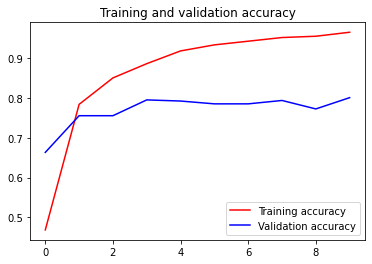

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

acc = inception_history.history['accuracy']
val_acc = inception_history.history['val_accuracy']
loss = inception_history.history['loss']
val_loss = inception_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

### Mobile Net V2

In [8]:
import tensorflow_hub as hub

mobilenet_v2 = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'

mobilenet_v2_model = tf.keras.models.Sequential([
  hub.KerasLayer(mobilenet_v2, input_shape=IMG_SIZE + (3,), trainable=True),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

mobilenet_v2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 flatten (Flatten)           (None, 1001)              0         
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 256)               256512    
                                                                 
 dense_1 (Dense)             (None, 37)                9509      
                                                                 
Total params: 3,806,286
Trainable params: 3,772,174
Non-trainable params: 34,112
_________________________________________________________________


In [9]:
mobilenet_v2_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [10]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 mode='max',
                                                 min_delta=0.01,
                                                 patience=3,
                                                 factor=0.25,
                                                 verbose=1,
                                                 cooldown=0,
                                                 min_lr=0.0000001)

early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 mode='min',
                                                 min_delta=0.005,
                                                 patience=5,
                                                 verbose=1,
                                                 restore_best_weights=True)

In [11]:
mobilenet_v2_history = mobilenet_v2_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=25,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[reduce_lr, early_stopper]
)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


115/115 [==============================] - 86s 574ms/step - loss: 3.9659 - accuracy: 0.0717 - val_loss: 2.9619 - val_accuracy: 0.2557 - lr: 1.0000e-04
Epoch 2/25
115/115 [==============================] - 60s 524ms/step - loss: 2.7491 - accuracy: 0.3095 - val_loss: 2.0532 - val_accuracy: 0.5369 - lr: 1.0000e-04
Epoch 3/25
115/115 [==============================] - 60s 523ms/step - loss: 1.9724 - accuracy: 0.5060 - val_loss: 1.4488 - val_accuracy: 0.6733 - lr: 1.0000e-04
Epoch 4/25
115/115 [==============================] - 61s 525ms/step - loss: 1.4415 - accuracy: 0.6416 - val_loss: 1.1177 - val_accuracy: 0.7599 - lr: 1.0000e-04
Epoch 5/25
115/115 [==============================] - 61s 526ms/step - loss: 1.1726 - accuracy: 0.7019 - val_loss: 0.9341 - val_accuracy: 0.7884 - lr: 1.0000e-04
Epoch 6/25
115/115 [==============================] - 60s 521ms/step - loss: 0.9919 - accuracy: 0.7454 - val_loss: 0.8256 - val_accuracy: 0.8111 - lr: 1.0000e-04
Epoch 7/25
115/115 [===================

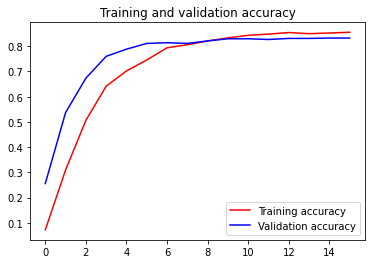

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = mobilenet_v2_history.history['accuracy']
val_acc = mobilenet_v2_history.history['val_accuracy']
loss = mobilenet_v2_history.history['loss']
val_loss = mobilenet_v2_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Saved Model

In [31]:
import time

saved_model_path = '/tmp/saved_models/{}'.format(int(time.time()))
tf.compat.v1.keras.experimental.export_saved_model(mobilenet_v2_model, saved_model_path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `tf.keras.experimental.export_saved_model` is deprecatedand will be removed in a future version. Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.
  after removing the cwd from sys.path.
/usr/lib/python3.7/contextlib.py:112: UserWarning: `tf.keras.backend.learning_phase_scope` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  return next(self.gen)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model_experimen

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: /tmp/saved_models/1653758162/saved_model.pb


INFO:tensorflow:SavedModel written to: /tmp/saved_models/1653758162/saved_model.pb


In [32]:
!zip -r /tmp/saved_models.zip /tmp/saved_models

from google.colab import files
files.download("/tmp/saved_models.zip")

  adding: tmp/saved_models/ (stored 0%)
  adding: tmp/saved_models/1653758162/ (stored 0%)
  adding: tmp/saved_models/1653758162/saved_model.pb (deflated 92%)
  adding: tmp/saved_models/1653758162/assets/ (stored 0%)
  adding: tmp/saved_models/1653758162/assets/saved_model.json (deflated 72%)
  adding: tmp/saved_models/1653758162/variables/ (stored 0%)
  adding: tmp/saved_models/1653758162/variables/variables.index (deflated 81%)
  adding: tmp/saved_models/1653758162/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: tmp/saved_models/1653758162/variables/checkpoint (deflated 37%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Playground

In [27]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=IMG_SIZE)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  result = mobilenet_v2_model.predict(images, batch_size=BATCH_SIZE)
  print(result[0].argmax())

Saving download.jpg to download.jpg
33


In [20]:
  training_data['label'].unique()[6]

'yorkshire_terrier'

In [26]:
classes[17]

'chihuahua'